In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm

from P3_helpers import *

In [3]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

In [ ]:
# Add vote number in round of election to df_vote_evolution
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
134690,Tekleni,Future Perfect at Sunrise,1,1.0,2006.0,2006-11-02 09:21:00,'''Strong Support''' This guy is going to be a...,1,60.833333,53
171895,Gator1,Andrew Norman,1,1.0,2005.0,2005-11-30 15:45:00,'''Support''' would be a good admin.,1,0.366667,3
164911,Kusma,Pegasus1138,1,-1.0,2006.0,2006-05-30 22:37:00,"'''Support''', does good work. A bit more pati...",4,18.700000,37
129081,Lar,BrownHairedGirl,1,1.0,2006.0,2006-05-14 18:28:00,Been agonising about this one... I think a bit...,1,165.700000,85
161633,RyanGerbil10,Kafziel,1,-1.0,2006.0,2006-11-23 20:16:00,"'''Support.''' Although civility is important,...",2,77.700000,54


# Evolution of votes proportions through time

In [ ]:
df_vote_evolution = get_progressive_mean(df_vote_evolution)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
64353,The Transhumanist,Melesse,1,1.0,2008.0,2008-01-30 17:40:00,'''Support''' - per above. Keep up the good w...,1,2 days 23:01:59.999999998,58,0.724138
25656,SarekOfVulcan,Sphilbrick,1,1.0,2010.0,2010-11-12 15:25:00,"'''Support''' per nom, answers to questions, F...",1,0 days 20:40:00.000000001,59,0.779661
112070,Snowolf,bfissa,-1,-1.0,2007.0,2007-03-26 14:18:00,'''Oppose''' → Lack of experience <i><b>,1,0 days 00:15:00,7,-0.857143
72608,Daniel,BQZip01,-1,-1.0,2008.0,2008-01-28 10:56:00,Oppose per [[Wikipedia:Requests for adminship/...,2,1 days 07:39:00,21,0.047619
128561,DVD R W,Blnguyen,1,1.0,2006.0,2006-05-22 04:09:00,'''Support'''.,1,0 days 01:34:00.000000001,19,1.000000


#### Tendencies, center and dispersion

In [ ]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')]).progressive_mean

# Compute the median, first and last quartile
quartiles = get_quartiles(rolling_avg)
quartiles.Voting_time = time_to_float(quartiles.Voting_time)

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rolling_avg)
sem.Voting_time = time_to_float(sem.Voting_time)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Voting_time,lower,center,upper
504,1.0,291.0,0.270270,0.270270,0.270270
570,1.0,444.0,1.000000,1.000000,1.000000
497,1.0,283.0,0.530149,0.700529,0.798315
363,1.0,143.0,0.721134,0.910126,0.975000
534,1.0,332.0,0.239726,0.239726,0.239726


,Results,Voting_time,center,sem,lower,upper
641,1.0,691.0,0.777778,NaN,NaN,NaN
607,1.0,534.0,0.911106,0.000658,0.909816,0.912397
89,-1.0,89.0,0.293338,0.024482,0.245353,0.341323
190,-1.0,190.0,0.273948,0.106321,0.065558,0.482338
305,1.0,85.0,0.866763,0.008212,0.850667,0.882860


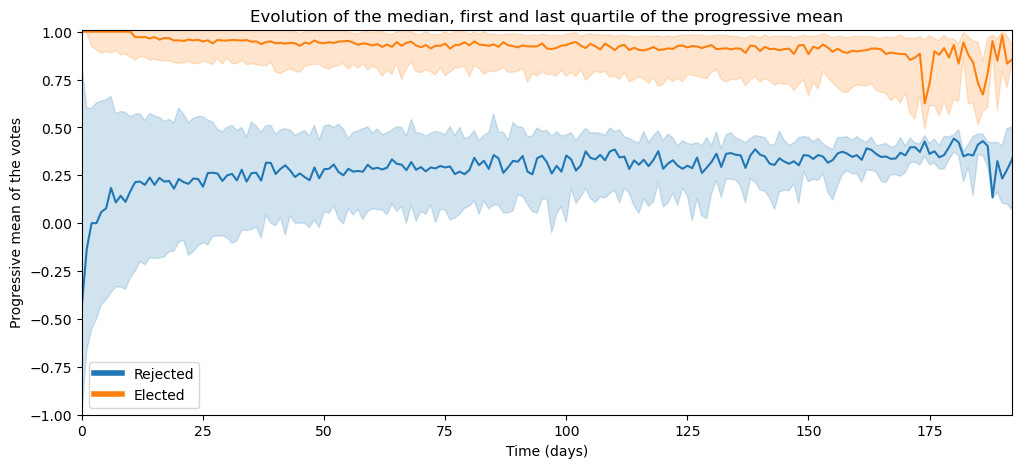

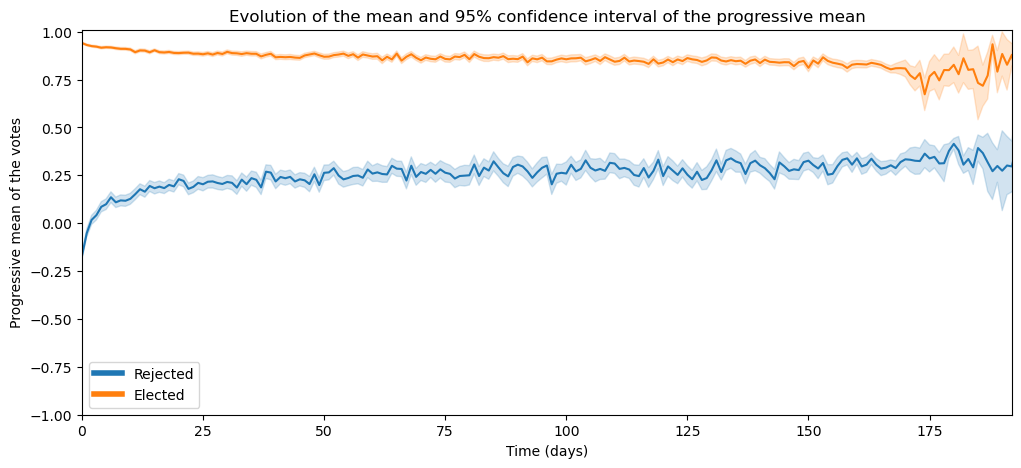

In [ ]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Voting_time')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Voting_time')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()


In [ ]:
df_vote_evolution

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0 days 00:00:00,1,1.000000
115406,BigDT,Ferrett3,-1,-1.0,2007.0,2007-02-19 03:19:00,'''Suggest withdrawal''' - most admins have th...,1,0 days 00:00:00,1,-1.000000
48617,Youngamerican,Jerem43,1,-1.0,2009.0,2009-07-17 11:23:00,'''Support''' as nom.,1,0 days 00:00:00,1,1.000000
115391,U.S.A.U.S.A.U.S.A.,FastLizard4,1,-1.0,2007.0,2007-11-10 05:35:00,--,1,0 days 00:00:00,1,1.000000
115324,Stangbat,Fan-1967,1,-1.0,2007.0,2007-01-26 02:50:00,'''Support''' per nom. I first encountered Fan...,1,0 days 00:00:00,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
105809,StuffOfInterest,SchuminWeb,1,1.0,2007.0,2007-06-11 16:32:00,'''Support'''. Would prefer to see a little l...,2,33 days 00:09:00,45,0.733333
105810,Blnguyen,SchuminWeb,1,1.0,2007.0,2007-06-12 00:26:00,'''Support''' - good contributor. ''',2,33 days 08:03:00,46,0.739130
105811,Captain panda,SchuminWeb,1,1.0,2007.0,2007-06-12 01:17:00,'''Support''' A good one to have the tools.,2,33 days 08:54:00,47,0.744681
105812,Vision Thing,SchuminWeb,1,1.0,2007.0,2007-06-12 19:23:00,'''Support''' I had some doubts on his last Rf...,2,34 days 03:00:00,48,0.750000


In [ ]:
# Election evolution by vote number
vote_nb = df_vote_evolution.groupby(['Results', 'Vote_number']).progressive_mean
# Compute the median, first and last quartile
quartiles = get_quartiles(vote_nb)

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(vote_nb)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Vote_number,lower,center,upper
208,-1.0,209,0.375598,0.401914,0.415072
532,1.0,256,0.697266,0.886719,0.912109
66,-1.0,67,0.134328,0.343284,0.481343
362,1.0,86,0.779070,0.918605,0.976744
42,-1.0,43,-0.023256,0.279070,0.534884


,Results,Vote_number,center,sem,lower,upper
405,1.0,129,0.799649,0.017858,0.764647,0.834651
359,1.0,83,0.861195,0.006985,0.847505,0.874885
472,1.0,196,0.725446,0.053233,0.621110,0.829782
102,-1.0,103,0.327925,0.020990,0.286785,0.369065
539,1.0,263,0.718631,0.220532,0.286388,1.150875


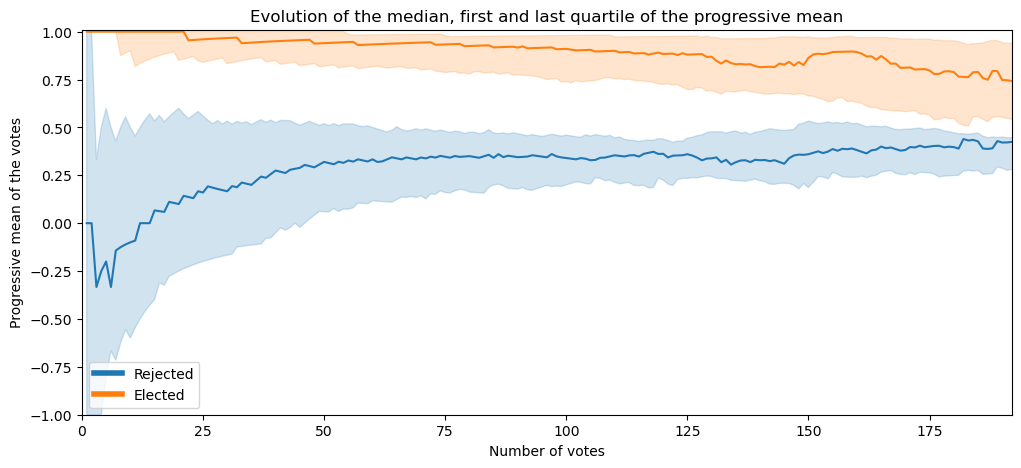

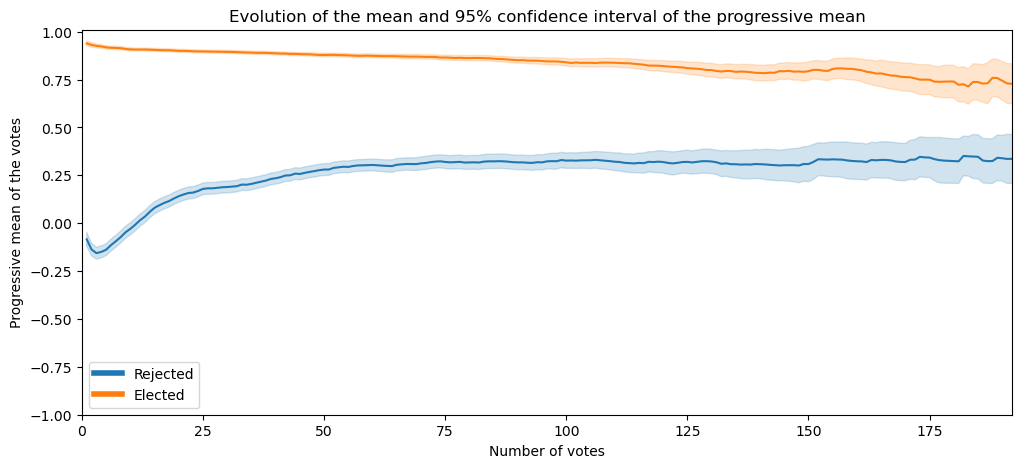

In [ ]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Vote_number')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Vote_number')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()

#### Scatter plots and density

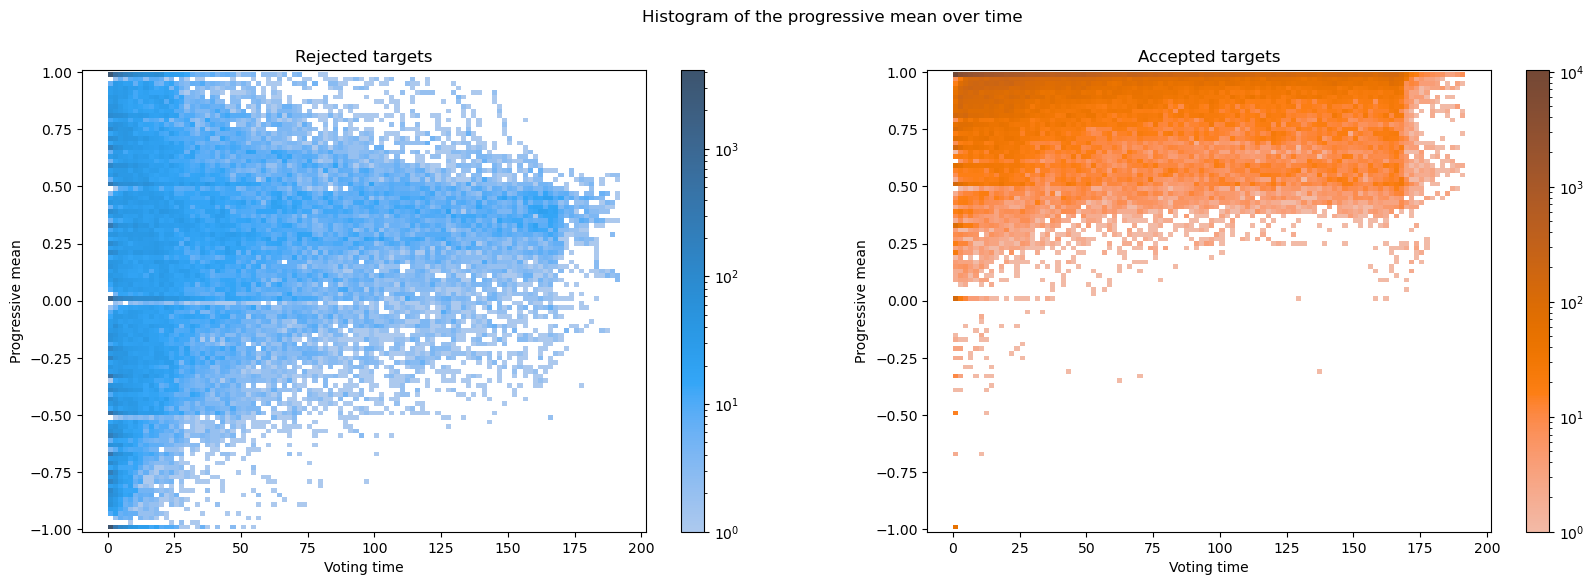

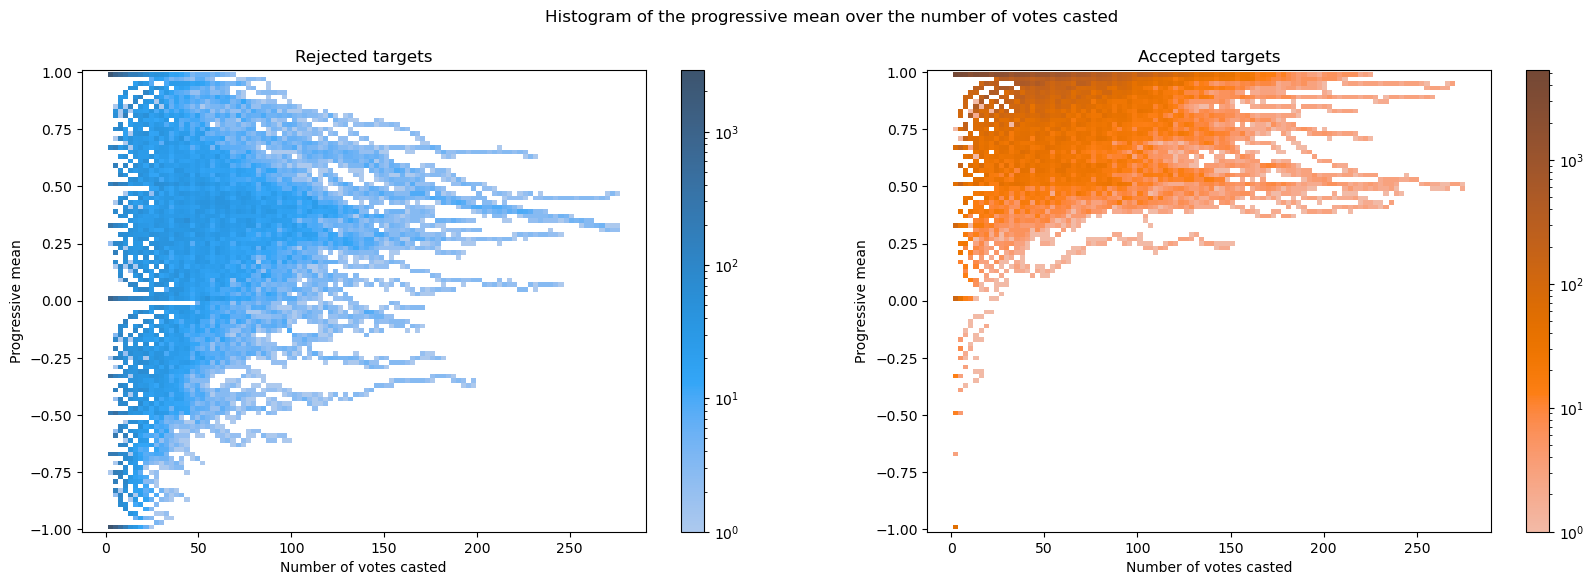

In [ ]:
from matplotlib.colors import LogNorm
# Scatter plot of the progressive mean by voting time and vote number
def plot_time_distribution(df, x):
    data = df[df.Voting_time < pd.Timedelta('8 days')]
    data.Voting_time = time_to_float(data.Voting_time)
    fig, axes = plt.subplots(1,2,figsize=(20, 6))
    # Plot the histogram in 2D with log scale colorbar
    sns.histplot(data=data[data.Results==-1], x=x, y='progressive_mean', ax=axes[0], color='tab:blue', cbar=True, norm=LogNorm(), vmin=None, vmax=None, bins=100)
    sns.histplot(data=data[data.Results==1], x=x, y='progressive_mean', ax=axes[1], color='tab:orange', cbar=True, norm=LogNorm(), vmin=None, vmax=None, bins=100)
    #axes[0].set_xlim(0, 8*24)
    #axes[1].set_xlim(0, 8*24)
    axes[0].set_ylim(-1.01, 1.01)
    axes[1].set_ylim(-1.01, 1.01)
    axes[0].set_ylabel('Progressive mean')
    axes[1].set_ylabel('Progressive mean')
    axes[0].set_title('Rejected targets')
    axes[1].set_title('Accepted targets')
    if x == 'Voting_time': 
        axes[0].set_xlabel('Voting time')
        axes[1].set_xlabel('Voting time')
        fig.suptitle('Histogram of the progressive mean over time')
    elif x == 'Vote_number': 
        axes[0].set_xlabel('Number of votes casted')
        axes[1].set_xlabel('Number of votes casted')
        fig.suptitle('Histogram of the progressive mean over the number of votes casted')
    plt.show()

plot_time_distribution(df_vote_evolution, 'Voting_time')
plot_time_distribution(df_vote_evolution, 'Vote_number')

# Prediction of the results based on early votes

In [ ]:
nb_first_votes = np.arange(5, 71, 5)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold

# Predict the result for each target with the first 5, 10, 15, ..., 50 votes using a gradient boosting classifier and cross validation to evaluate the performance
def predict_results(df, n_first_votes, n_folds):
    X = df[df.Vote_number <= n_first_votes][['Vote_number', 'progressive_mean', 'Target']]
    X.Target = X.Target.astype('category').cat.codes
    y = df[df.Vote_number <= n_first_votes]['Results']
    clf = GradientBoostingClassifier(random_state=0)
    # Perform cross validation by taking batches of 10 targets (and their votes) 
    scores = cross_validate(clf, X, y, cv=GroupKFold(n_splits=n_folds), groups=X.Target, scoring=('accuracy', 'precision', 'recall'))
    return scores

# Train and evaluate the model for each number of first votes
n_folds = 10
scores = pd.DataFrame(index=pd.MultiIndex.from_product([nb_first_votes, np.arange(n_folds)], names=['nb_first_votes', 'fold']), columns=[['accuracy', 'precision', 'recall']])
for n in tqdm(nb_first_votes):
    res = pd.DataFrame(predict_results(df_vote_evolution, n, n_folds))
    scores.loc[n, :] = res[['test_accuracy', 'test_precision', 'test_recall']].values
scores.reset_index(inplace=True)

# Save the results
scores.to_csv('scores.csv', index=False)

100%|██████████| 14/14 [1:16:17<00:00, 326.97s/it]


accuracy precision    recall
nb_first_votes fold                              
5              0     0.804119  0.716792  0.924569
               1     0.825192  0.766462  0.898148
               2     0.836686  0.775752  0.899577
               3     0.816092  0.728661  0.908175
               4     0.807471  0.731465   0.88512
...                       ...       ...       ...
70             5     0.861552  0.828838  0.931944
               6     0.895951  0.882736  0.966575
               7     0.861617  0.859709  0.928805
               8     0.883436  0.897049   0.93266
               9     0.872027  0.844844  0.942648

[140 rows x 3 columns]

In [ ]:
metrics = ['accuracy', 'precision', 'recall']
fig, axes = plt.subplots(1,3,figsize=(20, 6))
# Get the data
for metric, ax in zip(metrics, axes):
    # Plot the results
    sns.lineplot(data=scores, x='nb_first_votes', y=metric, ax=ax, color='tab:blue')
    ax.set_title(metric + ' of the prediction')
    ax.set_xlabel('Number of first votes')
    ax.set_ylabel(metric)

plt.show()


NameError: name 'plt' is not defined

# Analysis of the sources